# Regression Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

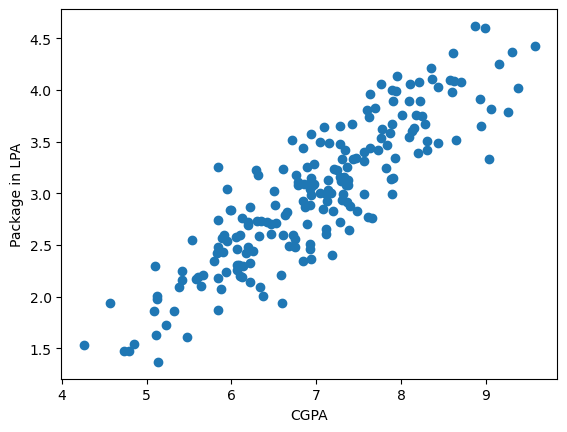

In [3]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [4]:
x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [5]:
print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package in LPA')

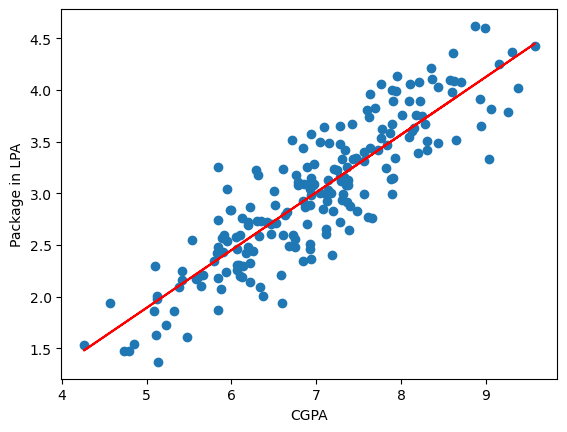

In [10]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(x_train, lr.predict(x_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [11]:
# for the metrics we have them pre-built

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
# predicted output
lr.predict(x_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [13]:
# test inputs
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [14]:
# the Metics
print("MAE = ", mean_absolute_error(y_test, lr.predict(x_test)))
print("MSE = ", mean_squared_error(y_test, lr.predict(x_test)))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))
print("R2 = ", r2_score(y_test, lr.predict(x_test)))

# always pass y_test first and then y_pred

MAE =  0.2884710931878175
MSE =  0.12129235313495527
RMSE =  0.34827051717731616
R2 =  0.780730147510384


In [15]:
# the adjusted r2_score can be calculated using the formula
r2 = r2_score(y_test, lr.predict(x_test))
adj_r2 = 1 - ((1-r2)*(40-1)/(40-1-1))   # since we have only 2 columns in which 1 is input n = k!!
adj_r2

0.7749598882343415

#### To demostrate the need for adj_r2

We will add a random column and show that the r2 score will increase but the adjust r2 doesn't...

In [16]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)    #since the data has 200 rows

# rearrange the columns
new_df = new_df[['cgpa', 'random_feature', 'package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.919111,3.26
1,5.12,0.954921,1.98
2,7.82,0.291699,3.25
3,7.42,0.449484,3.67
4,6.94,0.469675,3.57


Text(0, 0.5, 'Package LPA')

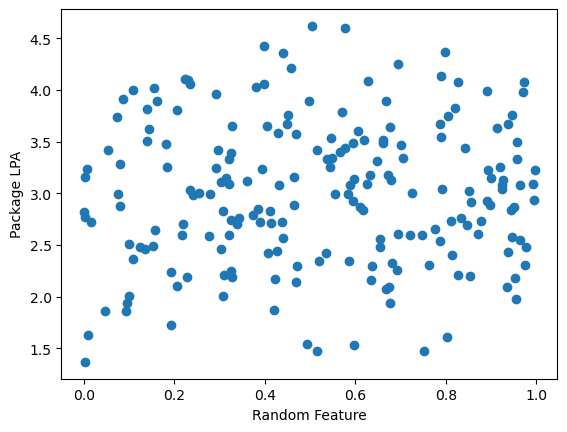

In [17]:
# plotting the graph
plt.scatter(new_df['random_feature'], new_df['package'])
plt.xlabel('Random Feature')
plt.ylabel('Package LPA')

In [18]:
x = new_df.iloc[:, 0:2]
y = new_df.iloc[:, -1]

In [19]:
# train test split again
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test)

In [23]:
print("R2_score =", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2_score = 0.7824815049840473


In [24]:
# the adjusted r2
1 - ((1-r2)*(40-1)/(40-1-2))    # since now we have 2 independent columns
# the adj_r2 score decreses compensating for the random data introsuced

0.7707237484966986

#### Add a valid column to the data

Now the adj_r2 should increase compared to the adj_r2 of the original data

In [25]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12, 12, 200)/10)
new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [26]:
new_df2.sample(5)

,cgpa,iq,package
193,4.57,2.94,1.94
143,4.85,2.34,1.54
77,8.99,4.80,4.60
65,7.60,4.71,3.81
76,6.94,2.75,3.15


Text(0, 0.5, 'Package LPA')

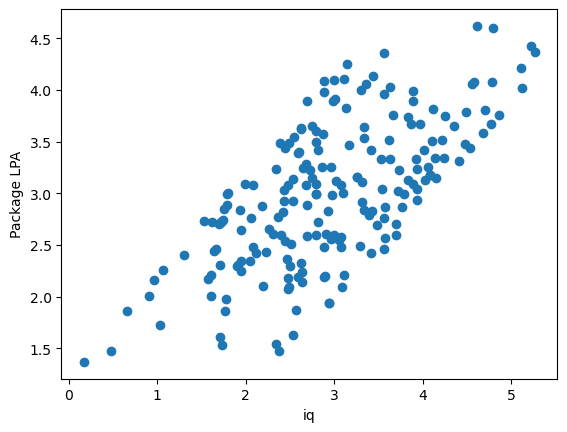

In [27]:
# plotting the randomly added column which has the same linearity as original data
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package LPA')

In [28]:
# create new input and output
x = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

In [29]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [30]:
# train the model
lr = LinearRegression()
lr.fit(x_test, y_test)
y_pred = lr.predict(x_test)

In [31]:
# r2 score
print("r2_score =", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

r2_score = 0.8268074375420502


In [32]:
# adjusted r2
1 - ((1-r2)*(40-1)/(40-1-2))

0.817445677409188